# FINAL PROJECT THICKET

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [2]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/random/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/perturbed/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/sorted/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/mpi/reverse/*.cali"))

# CUDA Thicket Variables

In [3]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/cuda/random2/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/cuda/perturbed2/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/cuda/sorted2/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("merge_ProjectOuts/cuda/reverse2/*.cali"))

In [4]:
tks = {}

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk


In [5]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["cuda_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  └─ 1.000 comm_small
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [6]:
# Performance data
for inputType in tks.keys():
    if "mpi" in inputType:
        tks[inputType].metadata["values_per_proc"] = tks[inputType].metadata["InputSize"] // tks[inputType].metadata["num_procs"]
        
tks["mpi_random"].metadata

cali.caliper.version  mpi.world.size  \
profile                                           
126739998            2.11.0-dev              16   
135998012            2.11.0-dev              64   
170756329            2.11.0-dev             128   
236483369            2.11.0-dev              16   
279833928            2.11.0-dev               2   
391233382            2.11.0-dev              32   
477670914            2.11.0-dev               2   
678962140            2.11.0-dev              16   
777157599            2.11.0-dev               8   
777171199            2.11.0-dev              16   
814944200            2.11.0-dev               2   
942921705            2.11.0-dev             128   
953649664            2.11.0-dev               2   
973322541            2.11.0-dev               4   
1057970717           2.11.0-dev               4   
1081557958           2.11.0-dev               8   
1466031684           2.11.0-dev              32   
1470413798           2.11.0-dev              64   
1601200366           2.11.0-dev              32   
1686756245           2.11.0-dev              64   
1838211885           2.11.0-dev              32   
1841984813           2.11.0-dev             128   
1868618761           2.11.0-dev              64   
1913950878           2.11.0-dev               2   
1947517922           2.11.0-dev               4   
2197662239           2.11.0-dev               2   
2283043990           2.11.0-dev             128   
2455432849           2.11.0-dev               8   
2532419756           2.11.0-dev               4   
2563967957           2.11.0-dev              64   
2666770009           2.11.0-dev              64   
2716965437           2.11.0-dev               8   
2717719667           2.11.0-dev              32   
2749333483           2.11.0-dev               4   
2886223632           2.11.0-dev              16   
2921704373           2.11.0-dev              32   
2934121856           2.11.0-dev               8   
3070460776           2.11.0-dev             128   
3300404828           2.11.0-dev               4   
3597322656           2.11.0-dev               2   
3787455050           2.11.0-dev             128   
3794481039           2.11.0-dev               8   
3805141186           2.11.0-dev              64   
3928713240           2.11.0-dev             128   
4001942517           2.11.0-dev               8   
4003808136           2.11.0-dev               4   
4011824924           2.11.0-dev              32   
4146364712           2.11.0-dev              16   
4250107605           2.11.0-dev              16   

                                                 spot.metrics  \
profile                                                         
126739998   min#inclusive#sum#time.duration,max#inclusive#...   
135998012   min#inclusive#sum#time.duration,max#inclusive#...   
170756329   min#inclusive#sum#time.duration,max#inclusive#...   
236483369   min#inclusive#sum#time.duration,max#inclusive#...   
279833928   min#inclusive#sum#time.duration,max#inclusive#...   
391233382   min#inclusive#sum#time.duration,max#inclusive#...   
477670914   min#inclusive#sum#time.duration,max#inclusive#...   
678962140   min#inclusive#sum#time.duration,max#inclusive#...   
777157599   min#inclusive#sum#time.duration,max#inclusive#...   
777171199   min#inclusive#sum#time.duration,max#inclusive#...   
814944200   min#inclusive#sum#time.duration,max#inclusive#...   
942921705   min#inclusive#sum#time.duration,max#inclusive#...   
953649664   min#inclusive#sum#time.duration,max#inclusive#...   
973322541   min#inclusive#sum#time.duration,max#inclusive#...   
1057970717  min#inclusive#sum#time.duration,max#inclusive#...   
1081557958  min#inclusive#sum#time.duration,max#inclusive#...   
1466031684  min#inclusive#sum#time.duration,max#inclusive#...   
1470413798  min#inclusive#sum#time.duration,max#inclusive#...   
1601200366  min#inclusive#sum#time.duration,max#inclusive#...   
1686756245  min#inclusive#sum#time.duration,

In [7]:
tks.keys()

dict_keys(['mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed', 'cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed'])

In [8]:
gbs = {}

for i in tks.keys():
    if "mpi" in i:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("values_per_proc")
    else:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("InputSize")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b034fcfcf10>, 262144: <thicket.thicket.Thicket object at 0x2b034fe34dc0>, 1048576: <thicket.thicket.Thicket object at 0x2b034feb77c0>, 4194304: <thicket.thicket.Thicket object at 0x2b034fd7be20>, 16777216: <thicket.thicket.Thicket object at 0x2b034fcd1880>, 67108864: <thicket.thicket.Thicket object at 0x2b034fcd1d30>, 268435456: <thicket.thicket.Thicket object at 0x2b034fb37880>}
19  thickets created...
{512: <thicket.thicket.Thicket object at 0x2b034fbe0490>, 1024: <thicket.thicket.Thicket object at 0x2b034fb5b9d0>, 2048: <thicket.thicket.Thicket object at 0x2b034fd82e50>, 4096: <thicket.thicket.Thicket object at 0x2b034ffa26d0>, 8192: <thicket.thicket.Thicket object at 0x2b034fcea6d0>, 16384: <thicket.thicket.Thicket object at 0x2b034f94f610>, 32768: <thicket.thicket.Thicket object at 0x2b034ff621f0>, 65536: <thicket.thicket.Thicket object at 0x2b034ffe6730>, 131072: <thicket.thicket.Thicket object at 0x2b034fbf6160

11  thickets created...
{32768: <thicket.thicket.Thicket object at 0x2b03509b6a30>, 65536: <thicket.thicket.Thicket object at 0x2b03509b6e50>, 131072: <thicket.thicket.Thicket object at 0x2b03509cb220>, 262144: <thicket.thicket.Thicket object at 0x2b03509d0220>, 524288: <thicket.thicket.Thicket object at 0x2b03509d9dc0>, 1048576: <thicket.thicket.Thicket object at 0x2b03509dd580>, 2097152: <thicket.thicket.Thicket object at 0x2b03509ee070>, 4194304: <thicket.thicket.Thicket object at 0x2b03509f5430>, 16777216: <thicket.thicket.Thicket object at 0x2b0350a044c0>, 67108864: <thicket.thicket.Thicket object at 0x2b0350a09130>, 268435456: <thicket.thicket.Thicket object at 0x2b0350a11280>}
11  thickets created...
{32768: <thicket.thicket.Thicket object at 0x2b0350a0b8b0>, 65536: <thicket.thicket.Thicket object at 0x2b0350a241f0>, 131072: <thicket.thicket.Thicket object at 0x2b0350a2cd00>, 262144: <thicket.thicket.Thicket object at 0x2b0350a39130>, 524288: <thicket.thicket.Thicket object at 0

Compose these 3 groups column-wise to get a holistic view of the data

In [9]:
print(gbs.keys())

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])


In [10]:
ctks = {}

for i in gbs.keys():
#     if "strong" in i:
    if "mpi" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_procs"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )

In [11]:
valsPerProcList = ctks["mpi_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")

In [12]:
valsPerBlockList = ctks["cuda_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")


# 32768, 65536, 131072, 262144, 524288, 1048576, 2097152
# 65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456

Perform pandas operations to get the table in a desirable format for plotting

In [13]:
for i in ctks.keys():
    if "cuda" in i:
        if "strong" in i:
            for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

        else:
            for valPerBlock in valsPerBlockList: #[32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(valPerBlock, "nid"), (valPerBlock, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

    else:
        if "strong" in i:
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            
        else: 
            for valPerProc in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(valPerProc, "nid"), (valPerProc, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            

In [14]:
ctks["mpi_sorted_weak"].dataframe

512                                          \
                     Min time/rank Max time/rank Avg time/rank  Total time   
name       num_procs                                                         
main       2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            2.850393      2.971963      2.903119  371.599183   
comm       2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.012707      0.106925      0.059502    7.616285   
comm_large 2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.012662      0.106872      0.059448    7.609385   
comm_small 2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.000004      0.000005      0.000005    0.000591   
comp       2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.000015      0.015053      0.000136    0.017440   
comp_large 2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.015025      0.015025      0.015025    0.015025   
comp_small 2                   NaN           NaN           NaN         NaN   
           4                   NaN           NaN           NaN         NaN   
           8                   NaN           NaN           NaN         NaN   
           16                  NaN           NaN           NaN         NaN   
           32                  NaN           NaN           NaN         NaN   
           64                  NaN           NaN           NaN         NaN   
           128            0.000005      0.000022     

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [25]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    plot.get_figure().savefig("Team1/Report/Graphs/Merge/"+title+'.png')
    return plot

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker

def plot_pandas2(df, title, xlabel, ylabel, window_size, loglog):
    # Apply a rolling mean (smoothing) to the dataframe.
    # Note that 'window_size' is the number of samples to consider for the moving average.
    # You can adjust 'window_size' to control the amount of smoothing.
    df_smoothed = df.rolling(window=window_size, min_periods=1).mean()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    df_smoothed.plot(kind="line", marker='o', ax=ax, grid=True, loglog=loglog)
    
    # Setting titles and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Set the y-axis to logarithmic scale if loglog is True
    if loglog:
        ax.set_yscale('log', base=10)
        ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

    # Show grid and set the grid style
    ax.grid(True, which="both", ls="--", linewidth=0.5)

    # Save the figure
    fig.savefig("Team1/Report/Graphs/Merge/" + title + '.png')

    return ax

# Examples

In [17]:
ctks["mpi_random_weak"].dataframe.loc["main"]

512                                          \
          Min time/rank Max time/rank Avg time/rank  Total time   
num_procs                                                         
2                   NaN           NaN           NaN         NaN   
4                   NaN           NaN           NaN         NaN   
8                   NaN           NaN           NaN         NaN   
16                  NaN           NaN           NaN         NaN   
32                  NaN           NaN           NaN         NaN   
64                  NaN           NaN           NaN         NaN   
128            2.809186      2.931082      2.869017  367.234138   

                                      1024                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
num_procs                                                                
2                        NaN           NaN           NaN           NaN   
4                        NaN           NaN           NaN           NaN   
8                        NaN           NaN           NaN           NaN   
16                       NaN           NaN           NaN           NaN   
32                       NaN           NaN           NaN           NaN   
64                       NaN      2.549293      2.645579      2.598059   
128                 0.000586           NaN           NaN           NaN   

                                                  2048                \
           Total time Variance time/rank Min time/rank Max time/rank   
num_procs                                                              
2                 NaN                NaN           NaN           NaN   
4                 NaN                NaN           NaN           NaN   
8                 NaN                NaN           NaN           NaN   
16                NaN                NaN           NaN           NaN   
32                NaN                NaN      1.307617      1.361306   
64         166.275746           0.000456           NaN           NaN   
128               NaN                NaN      2.844867      2.929081   

                                                                4096  \
          Avg time/rank  Total time Variance time/rank Min time/rank   
num_procs                                                              
2                   NaN         NaN                NaN           NaN   
4                   NaN         NaN                NaN           NaN   
8                   NaN         NaN                NaN           NaN   
16                  NaN         NaN                NaN      0.780981   
32             1.329812   42.553985           0.000174           NaN   
64                  NaN         NaN                NaN      2.487375   
128            2.888822  369.769242           0.000333           NaN   

                                                                      \
          Max time/rank Avg time/rank  Total time Variance time/rank   
num_procs                                                              
2                   NaN           NaN         NaN                NaN   
4                   NaN           NaN         NaN                NaN   
8                   NaN           NaN         NaN                NaN   
16             0.790260      0.783069   12.529105           0.000005   
32                  NaN           NaN         NaN                NaN   
64             2.602677      2.527483  161.758885           0.000629   
128                 NaN           NaN         NaN                NaN   

                   8192                                          \
          Min time/rank Max time/rank Avg time/rank  Total time   
num_procs                                                         
2                   NaN           NaN           NaN         NaN   
4                   NaN           NaN           NaN         NaN   
8              0.514655      0.520572      0.515709    4.125676   
16                  NaN           NaN      

In [18]:
ctks.keys()

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])

In [19]:
function_names = ("main", "comm", "comp_large")

# MPI STRONG SCALING TIME PLOTS

[2.714992, 1.509272, 0.942367, 0.675083, 0.551528, 0.979769, 1.840495]


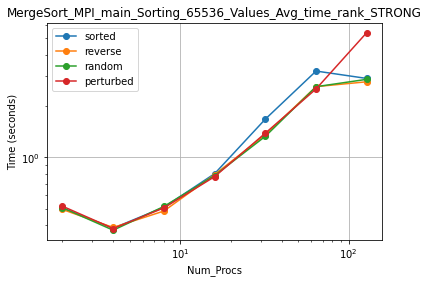

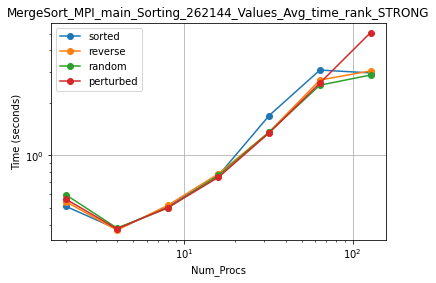

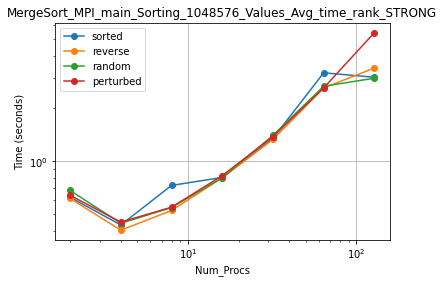

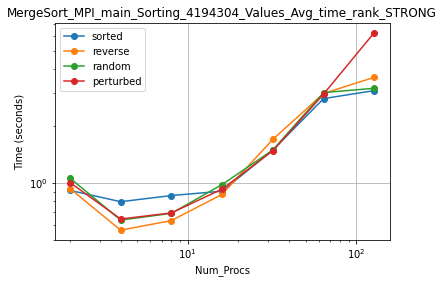

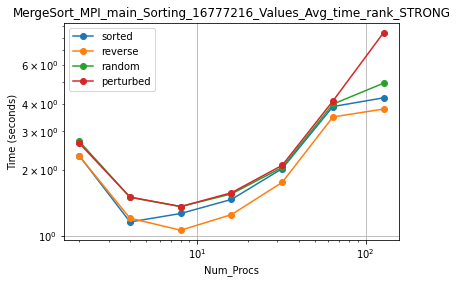

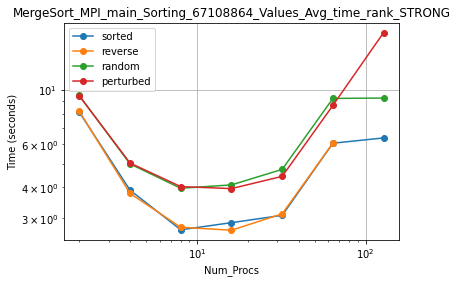

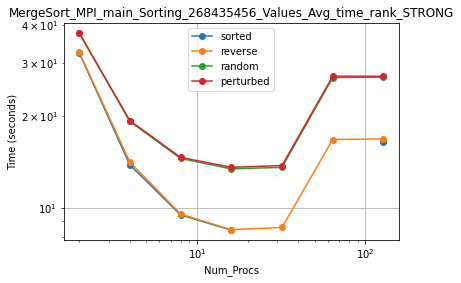

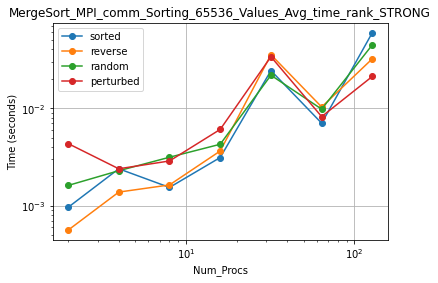

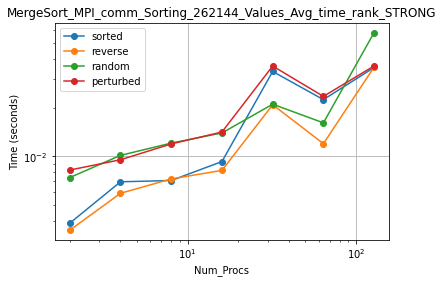

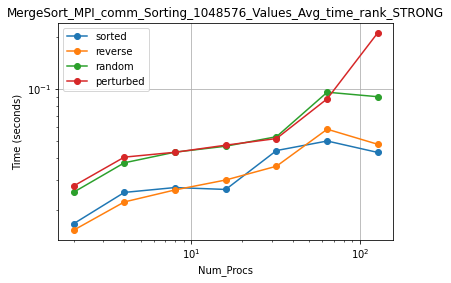

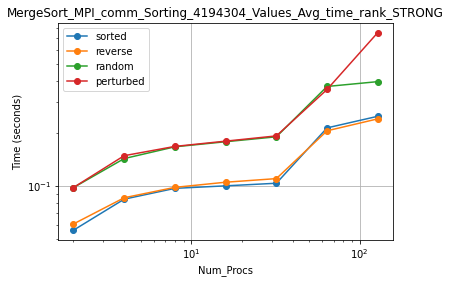

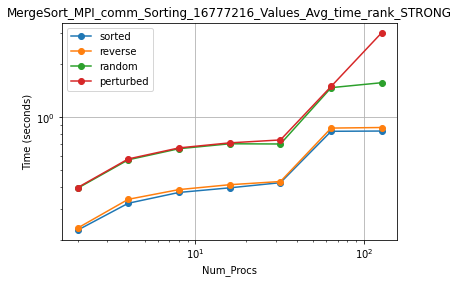

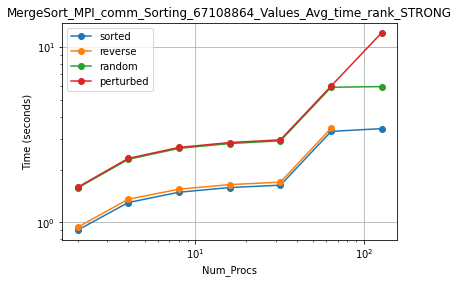

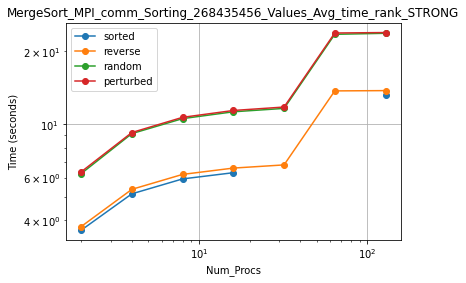

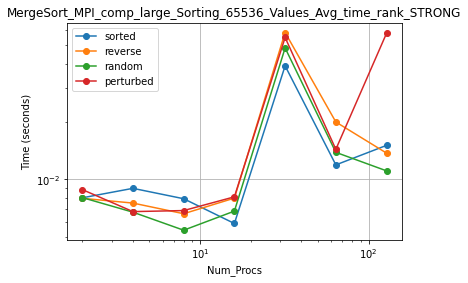

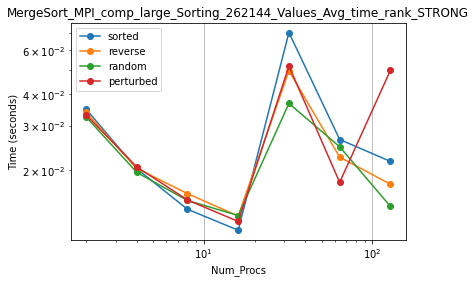

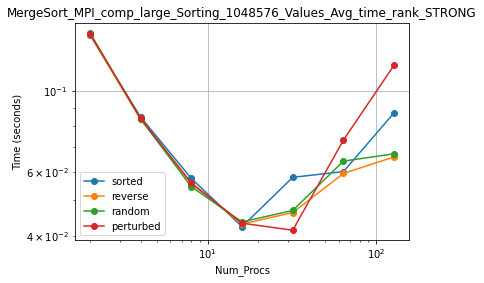

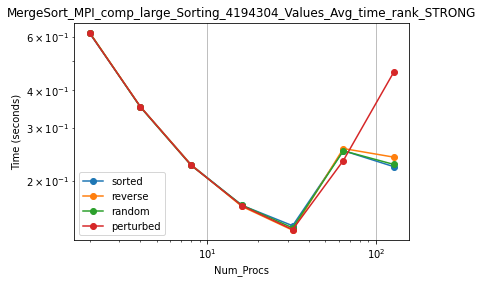

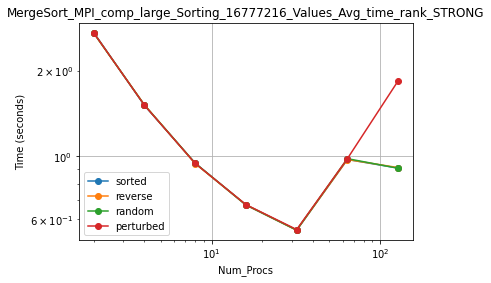

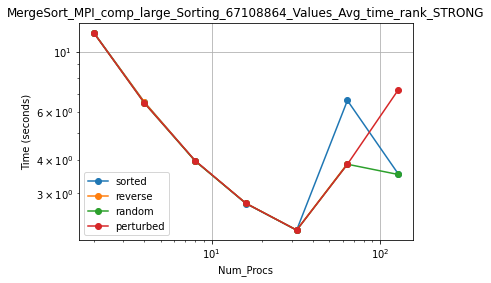

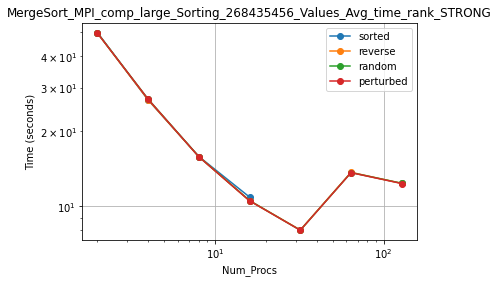

In [36]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "mpi" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 
        if(inputSize == 16777216 and name == "comp_large"):
            print(list(masterDF["perturbed"].values))   
            
        
        plot_pandas(
            df=masterDF,
            title="MergeSort_MPI_" + str(name) + "_Sorting_" + str(inputSize) + "_Values_Avg_time_rank_STRONG",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# MPI WEAK SCALING TIME PLOTS

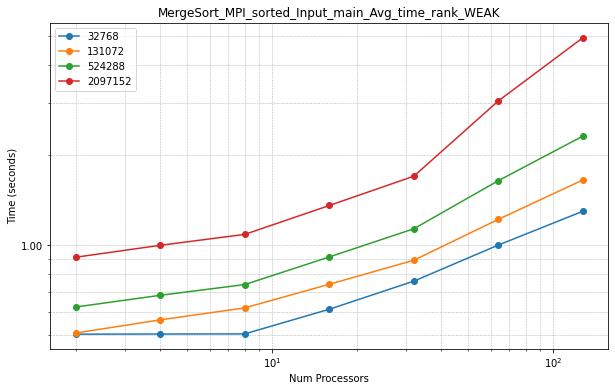

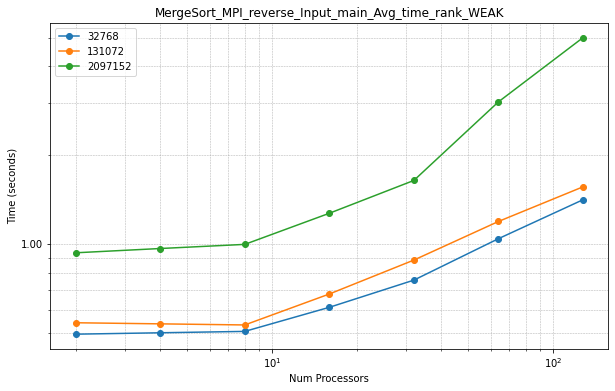

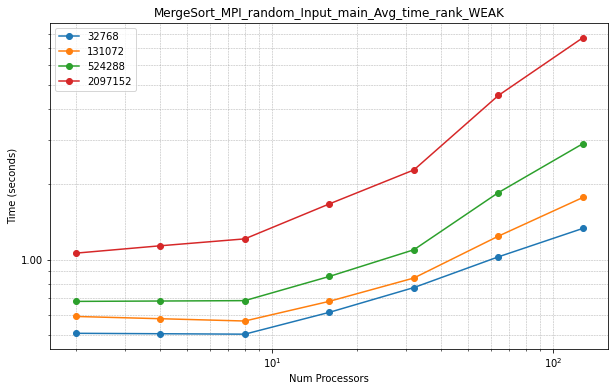

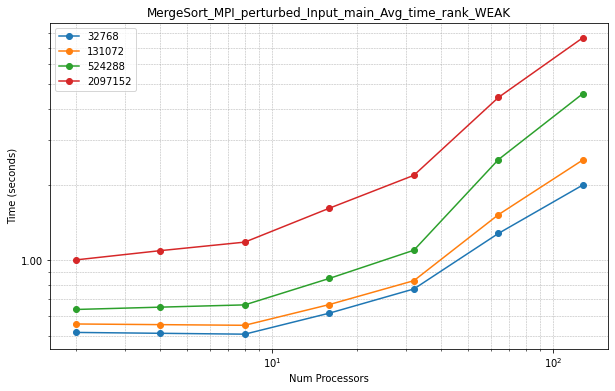

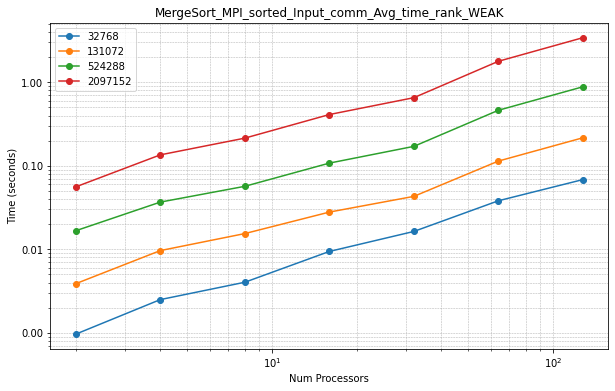

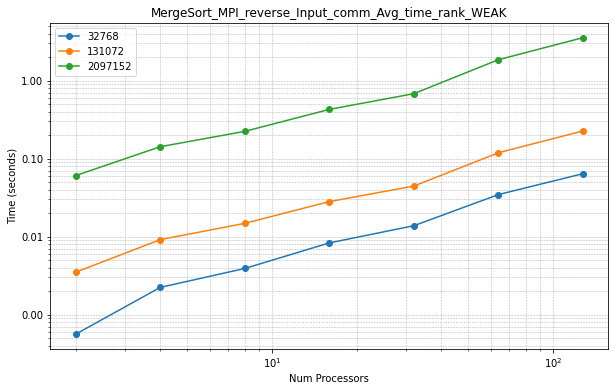

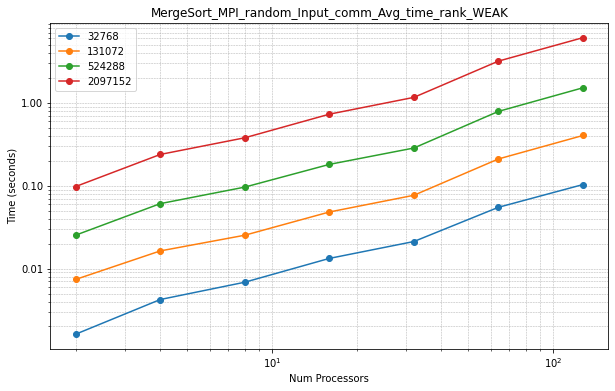

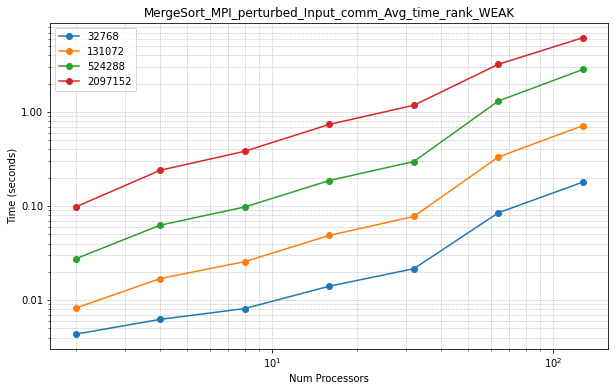

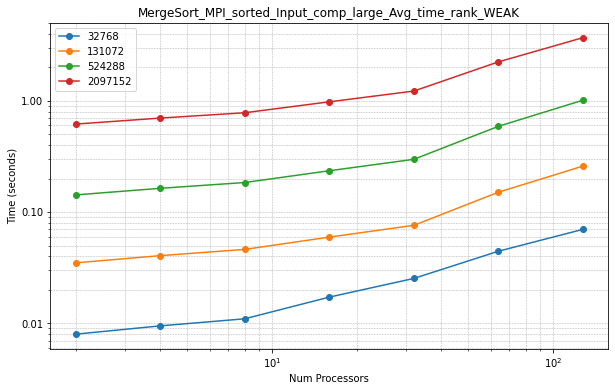

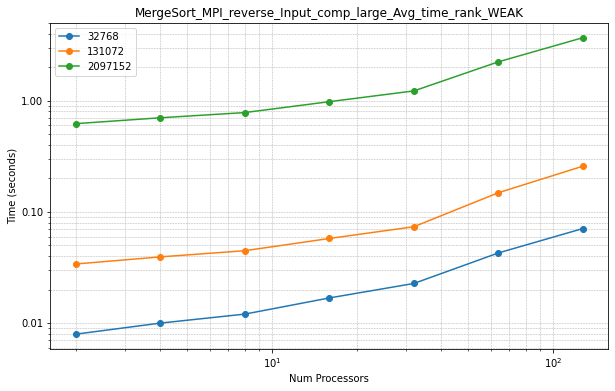

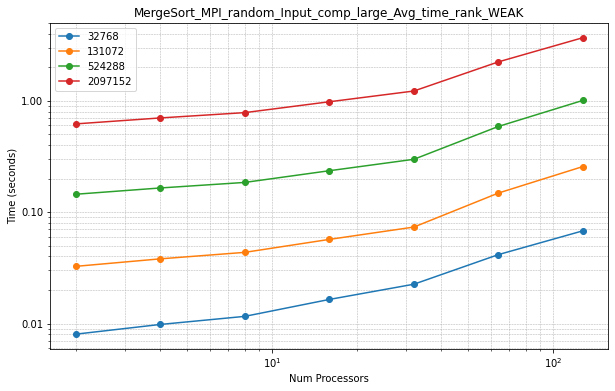

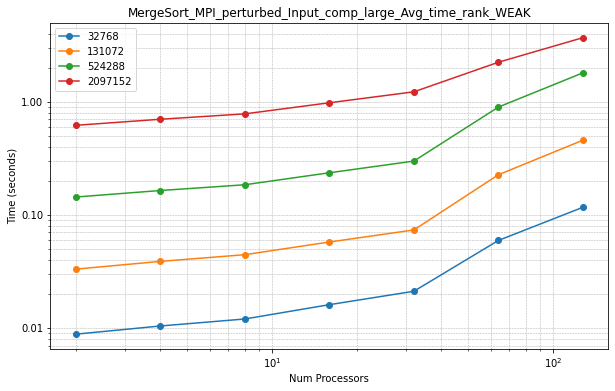

In [37]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "mpi" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]: #[262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0]: #[256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0, 16384.0, 32768.0, 65536.0, 131072.0, 262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0, 8388608.0, 16777216.0, 33554432.0, 67108864.0, 134217728.0]: # for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                #print(tempDF)
                if(count_nan(tempDF.values) > 3):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
                masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))
#             if(inputType == "mpi_random_weak" and name == "comp_large"):
#                 #print(list(masterDF["random"].values))
#                 print(masterDF)
#             if(name == "comp_large" and "random" in inputType):
#                 print(masterDF[262144])
                
            plot_pandas2(
                df=masterDF,
                title="MergeSort_MPI_" + str(inputType.split("_")[1]) + "_Input_" + str(name) + "_Avg_time_rank_WEAK",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                window_size= 7,
                loglog=True
            )

# CUDA STRONG SCALING TIME PLOTS

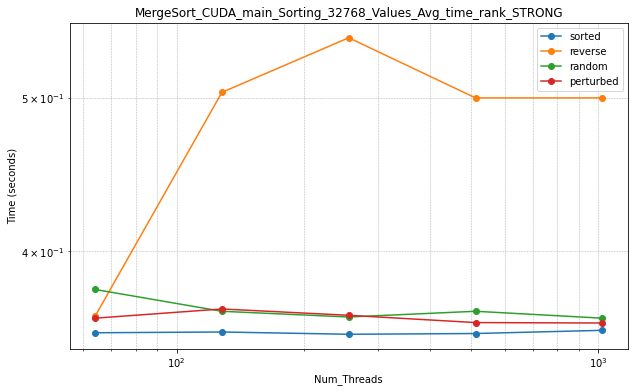

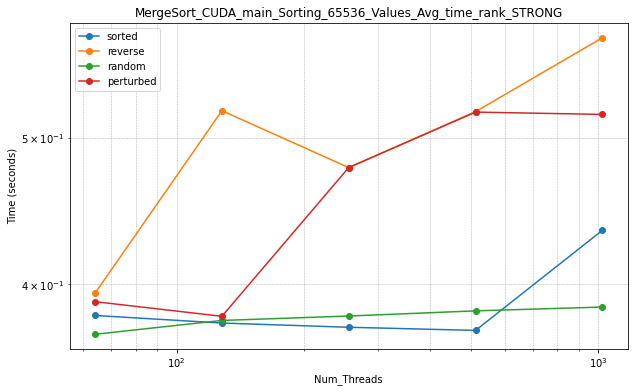

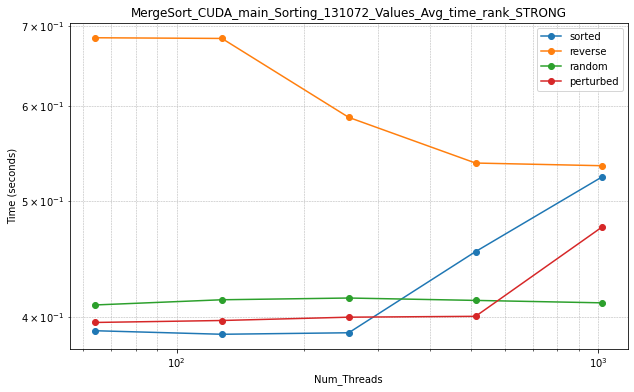

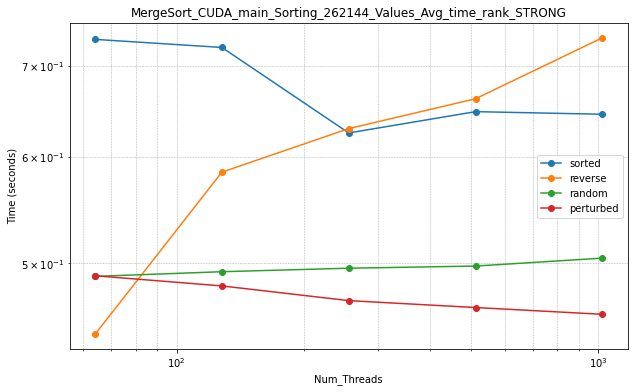

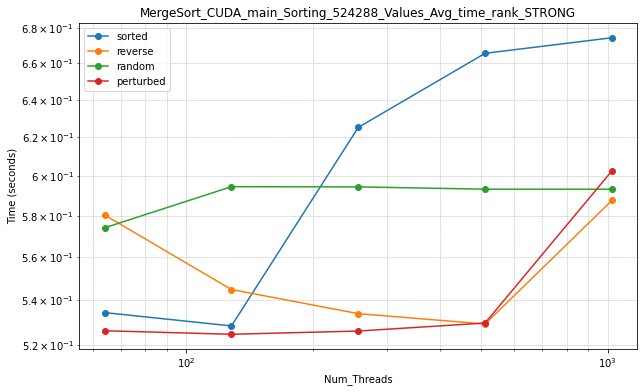

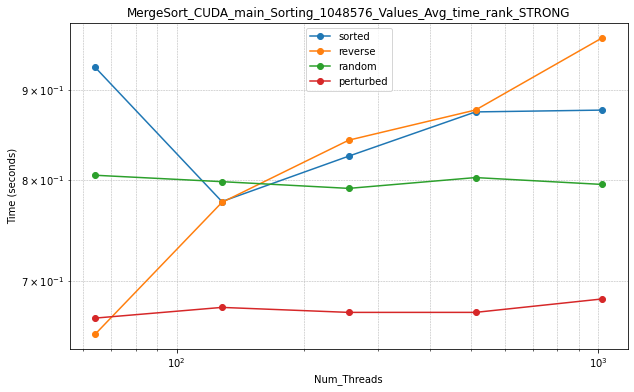

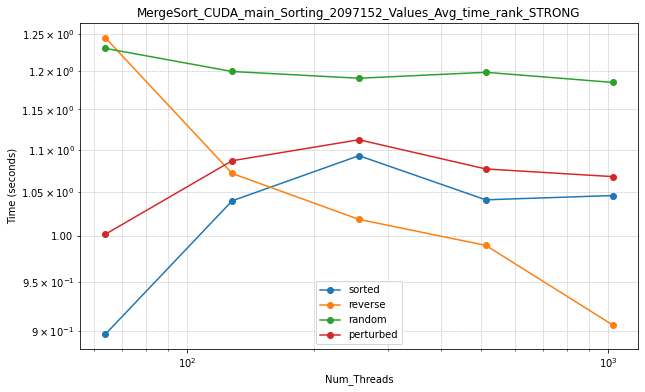

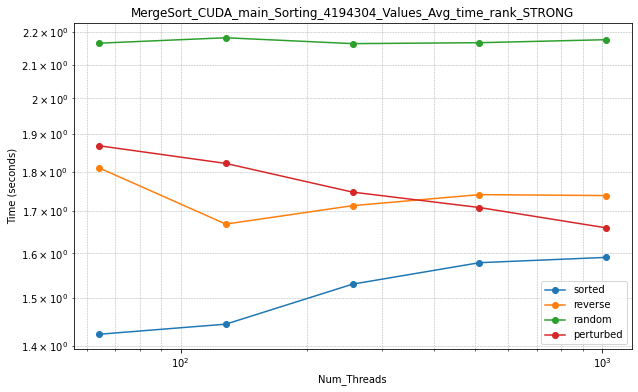

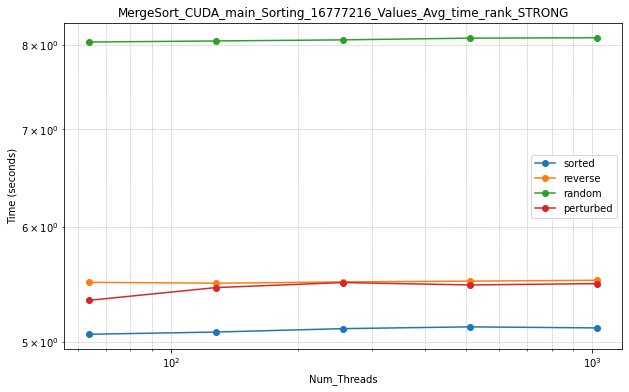

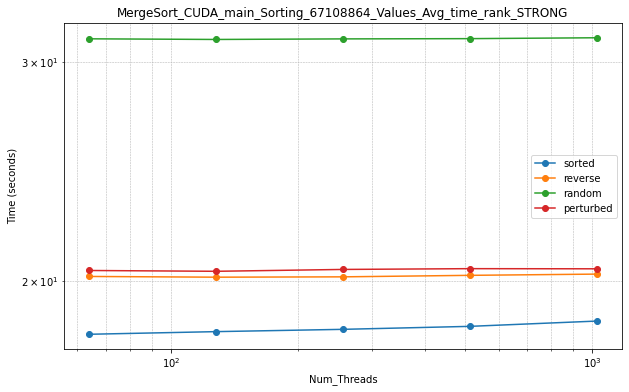

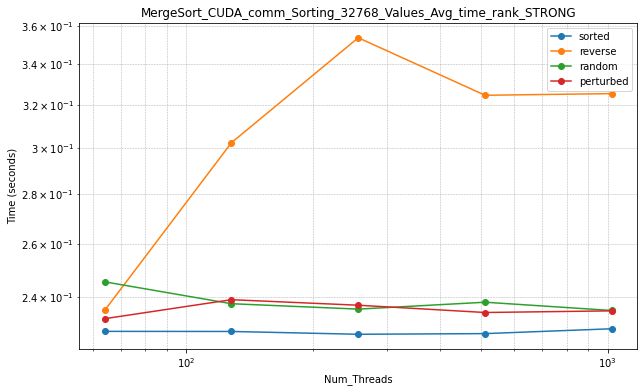

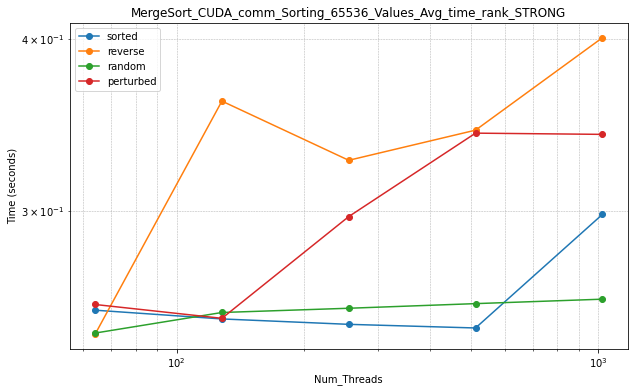

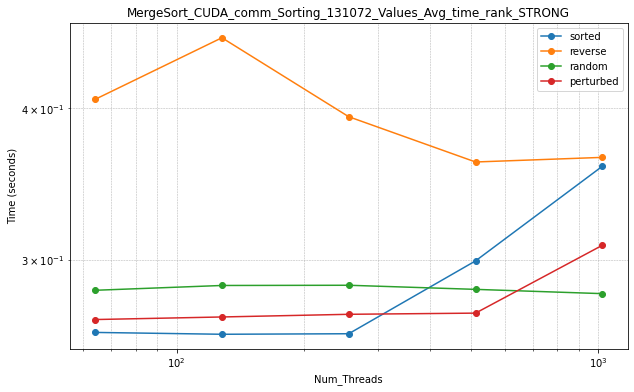

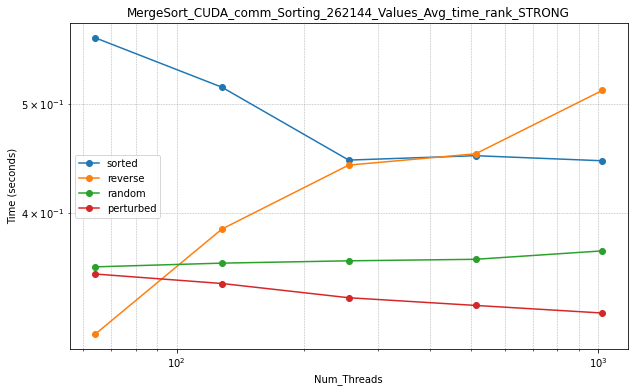

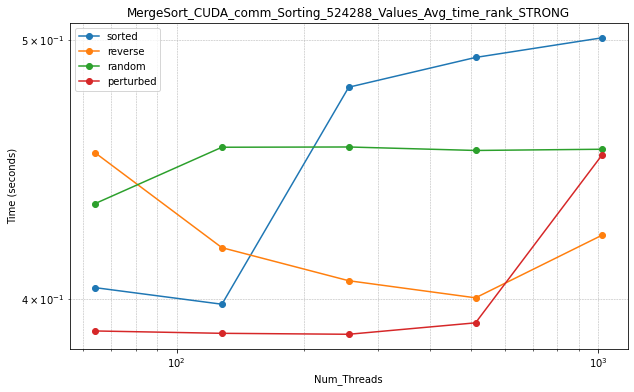

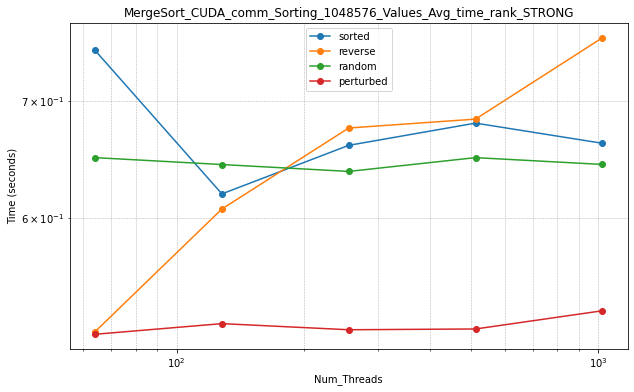

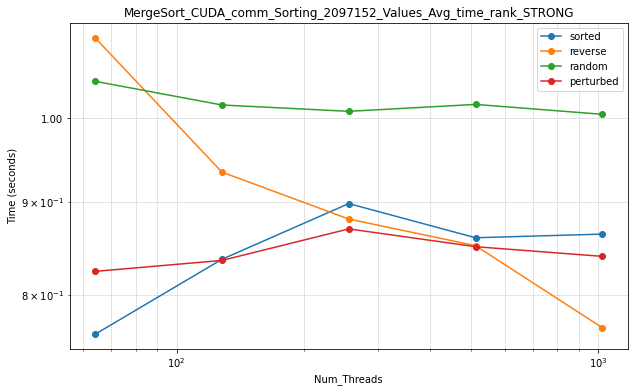

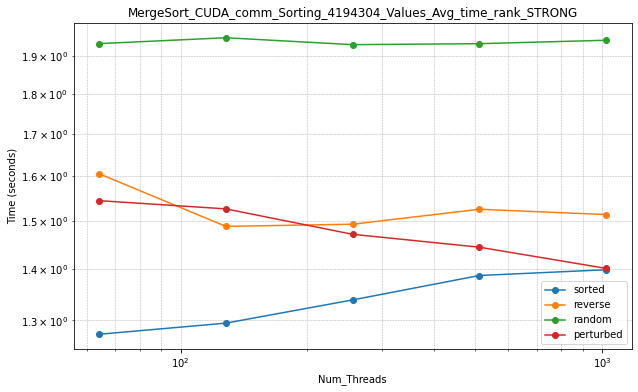

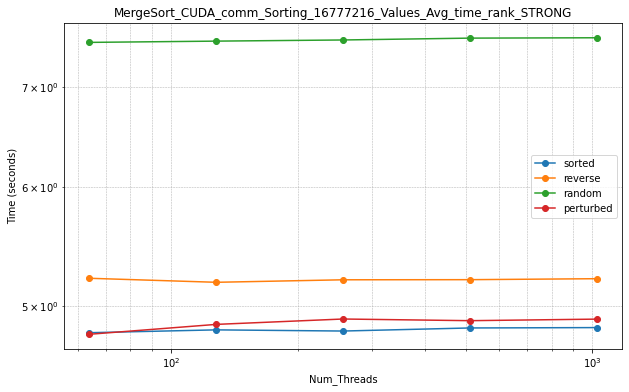

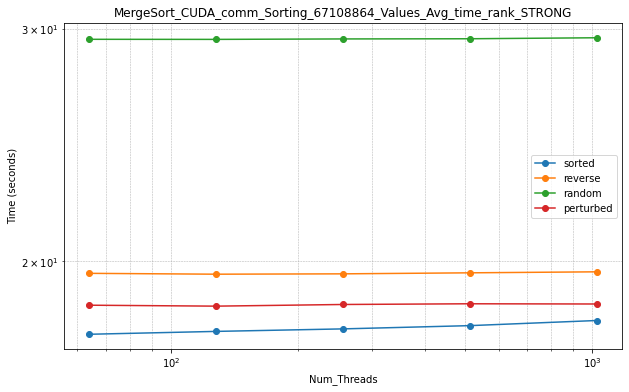

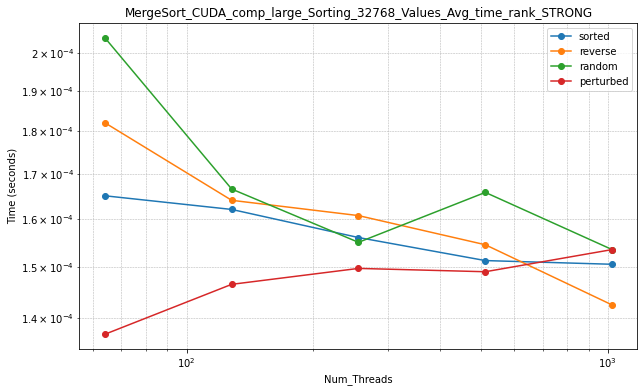

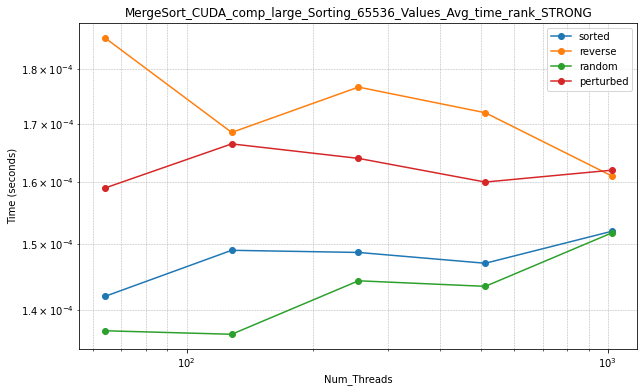

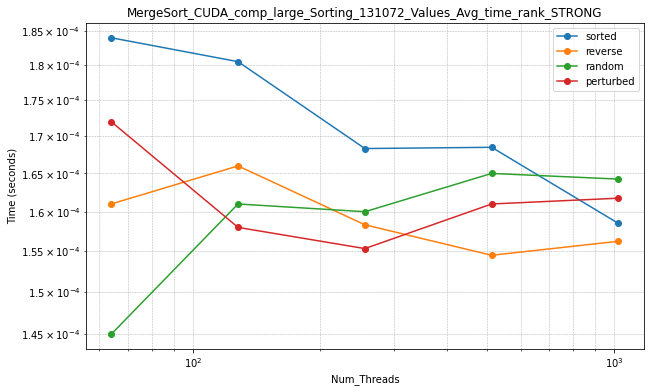

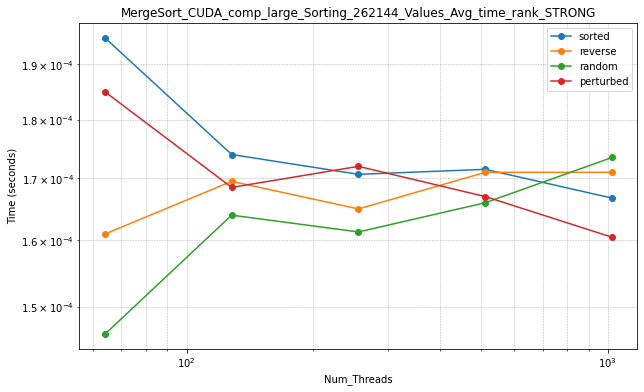

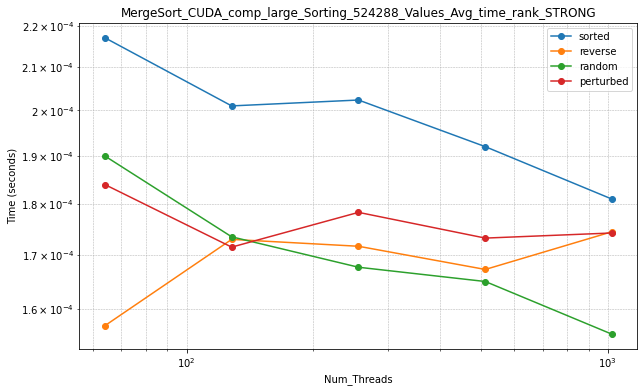

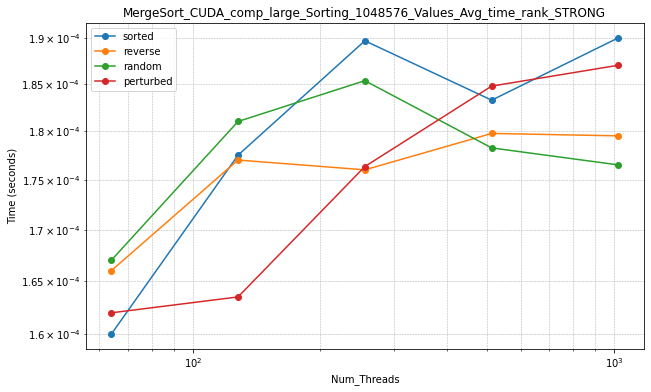

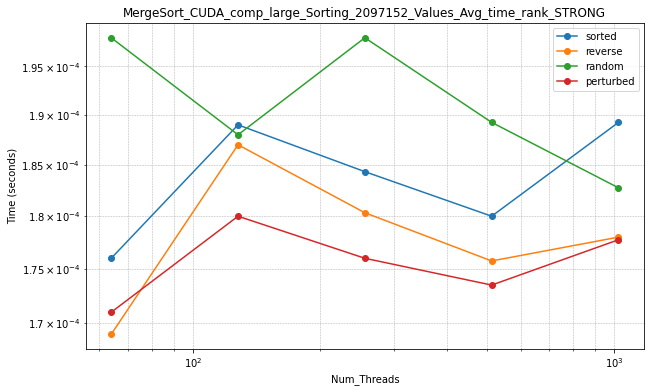

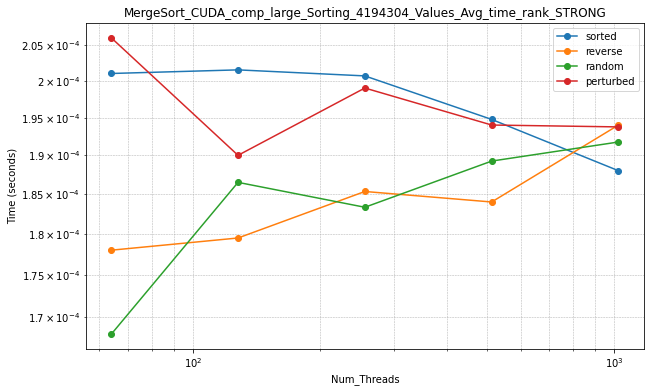

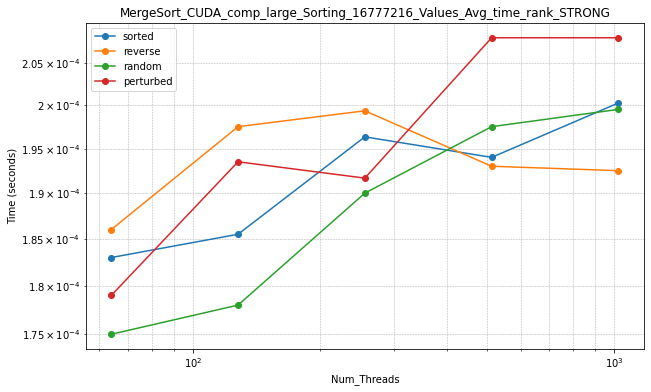

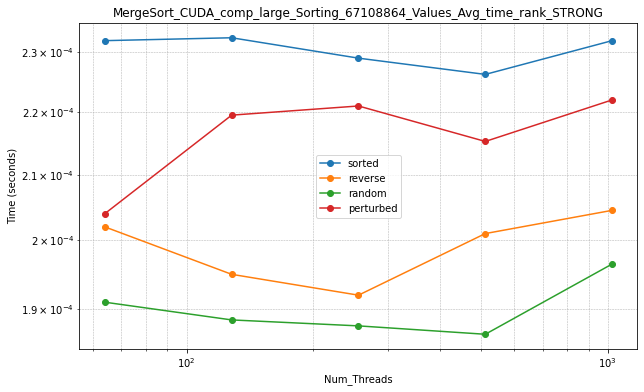

In [38]:
for name in function_names:
    for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152,4194304 , 16777216,67108864]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "cuda" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 
                
                        
#         if(inputSize == 1048576 and name == "main"):
#             print(list(masterDF["random"].values))

        plot_pandas2(
            df=masterDF,
            title="MergeSort_CUDA_" + str(name) + "_Sorting_" + str(inputSize) + "_Values_Avg_time_rank_STRONG",
            xlabel="Num_Threads",
            ylabel="Time (seconds)",
            window_size=4,
            loglog=True
        )

# CUDA WEAK SCALING TIME PLOTS

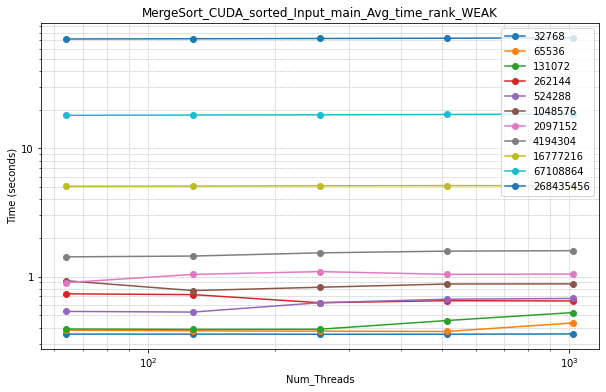

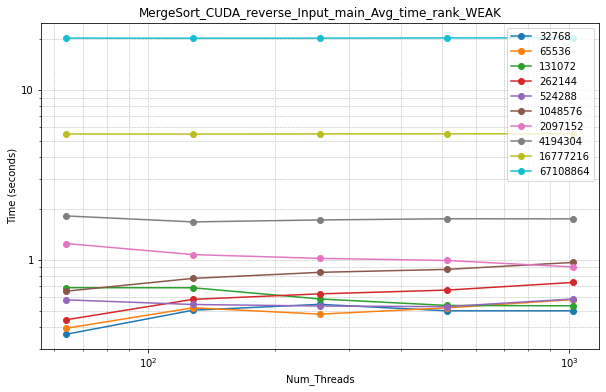

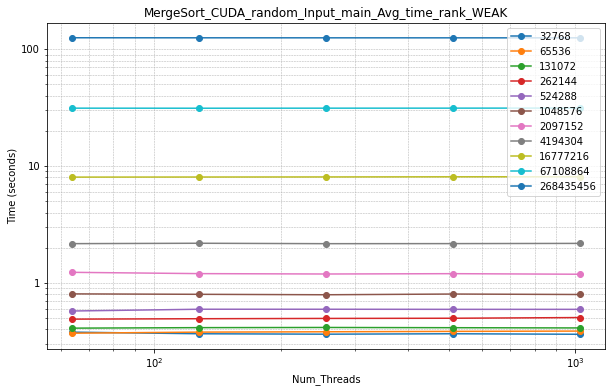

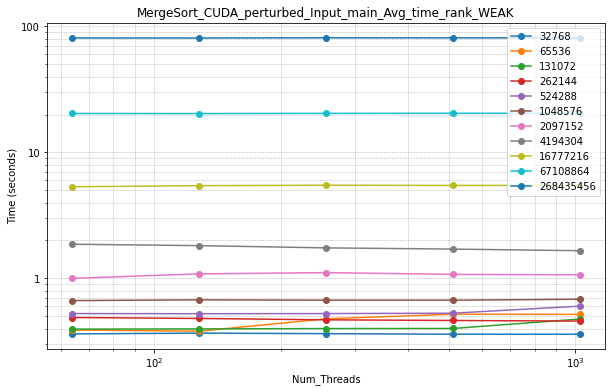

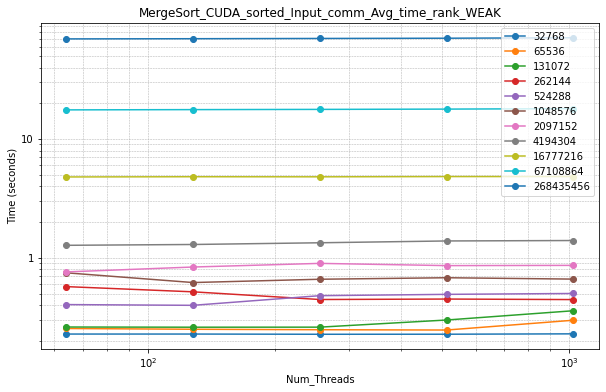

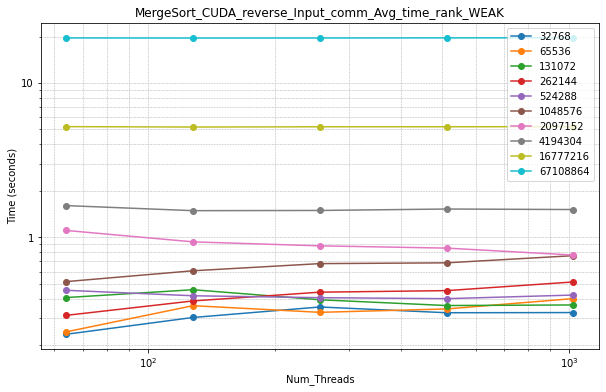

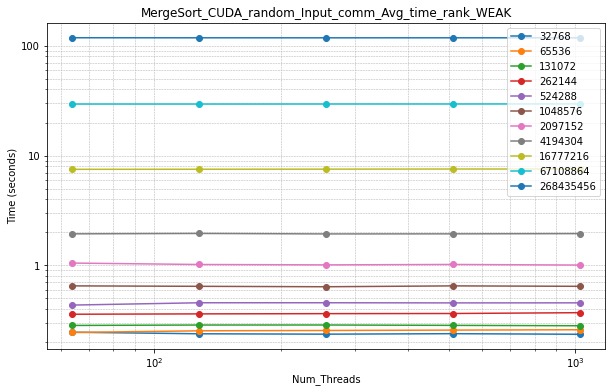

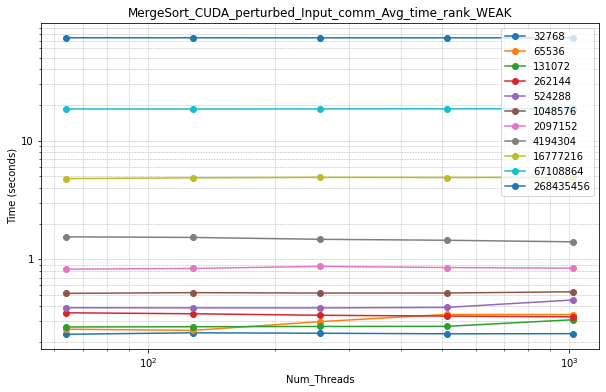

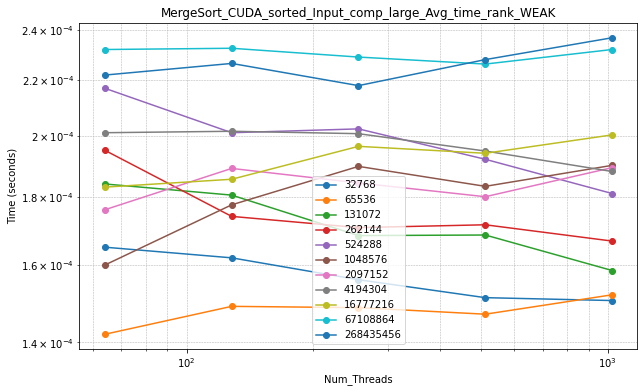

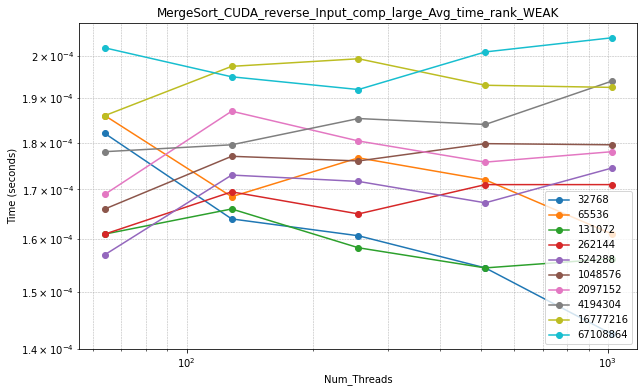

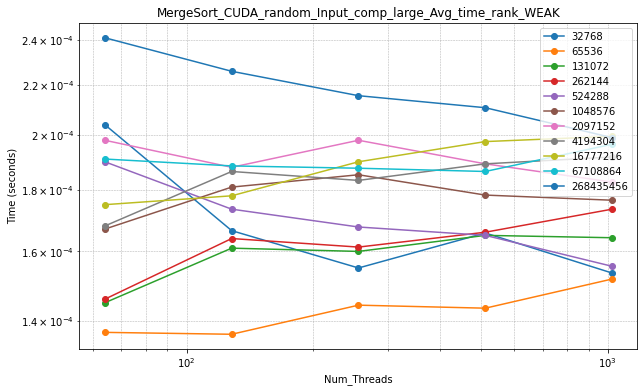

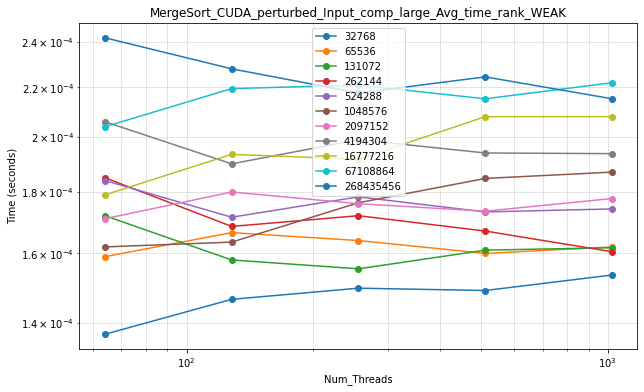

In [39]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "cuda" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerBlockList: #[32768, 65536, 131072, 262144, 524288, 1048576, 2097152]: #[64, 128, 256, 512, 1024]: 
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                
                if(count_nan(tempDF.values) > 3):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
#             masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))
#             print(masterDF)
#            if(name == "comp_large" and "random" in inputType):
#                 print(masterDF)
            
            plot_pandas2(
                df=masterDF,
                title="MergeSort_CUDA_" + str(inputType.split("_")[1]) + "_Input_" + str(name) + "_Avg_time_rank_WEAK",
                xlabel="Num_Threads",
                ylabel="Time (seconds)",
                window_size=4,
                loglog=True
            )

## Speedup

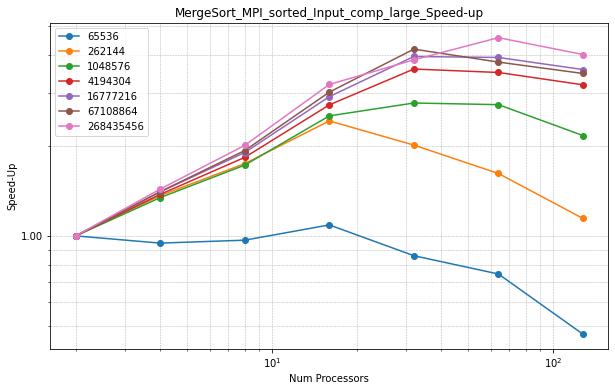

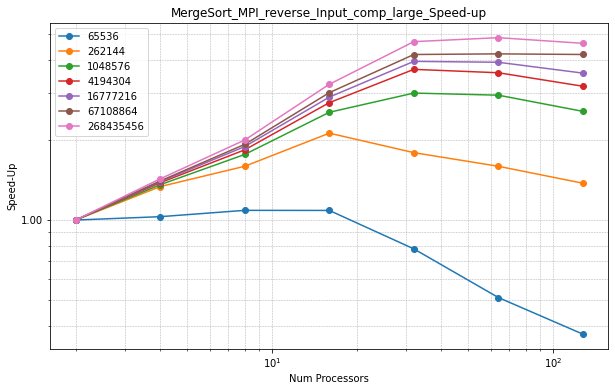

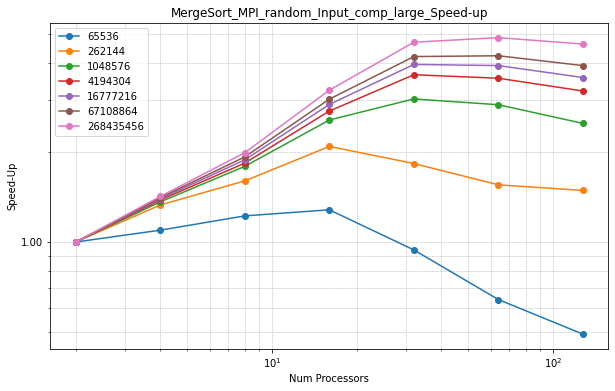

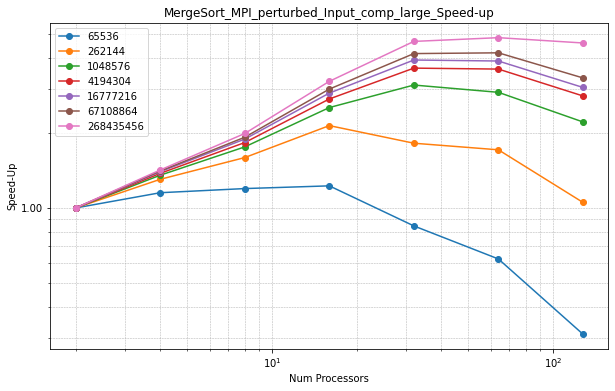

In [40]:
for inputType in ctks.keys():
    if("mpi" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
            tempDF = ctks[inputType].dataframe.loc["comp_large"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][2] / masterDF[inputSize]
            
#         if "random" in inputType:
#             print(list(masterDF[67108864]))
        
        

        plot_pandas2(
            df=masterDF,
            title="MergeSort_MPI_" + str(inputType.split("_")[1]) + "_Input_comp_large_Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            window_size=3,
            loglog=True
        )

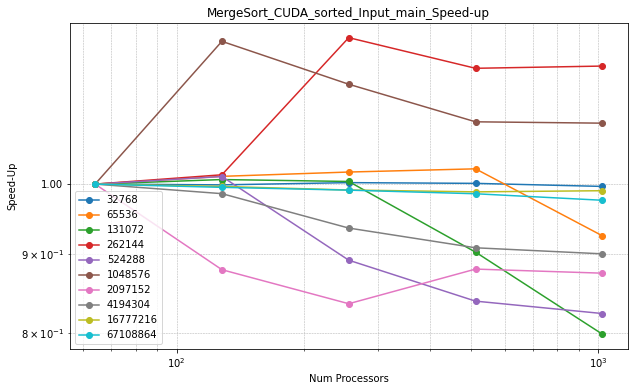

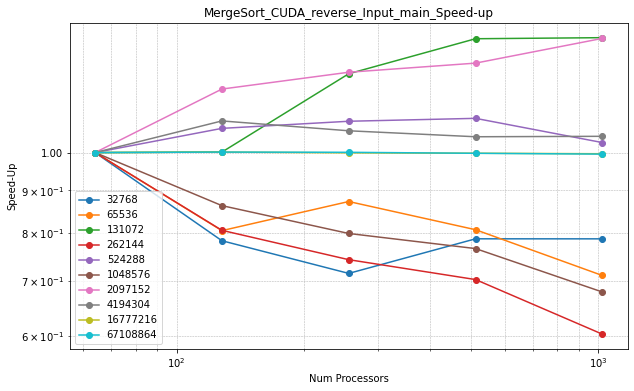

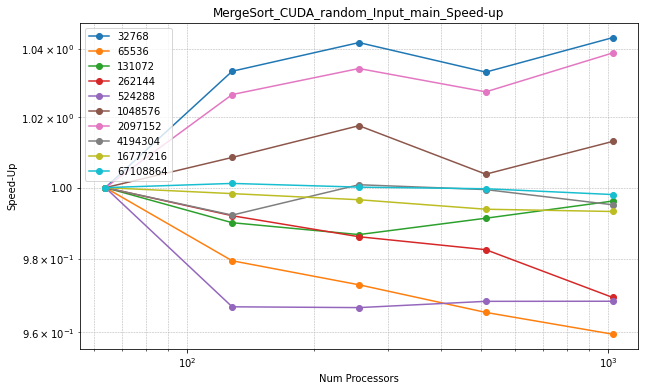

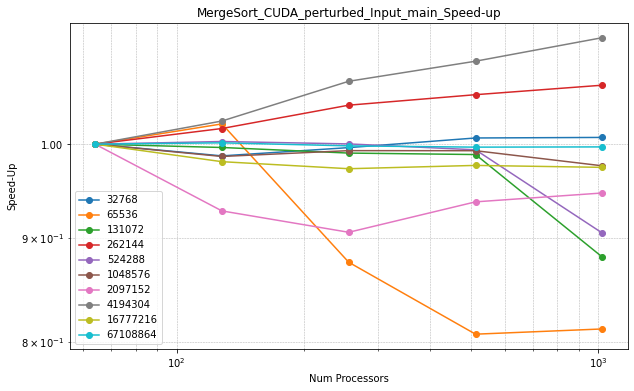

In [41]:
for inputType in ctks.keys():
    if("cuda" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152,4194304 , 16777216,67108864 ]:
            tempDF = ctks[inputType].dataframe.loc["main"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][64] / masterDF[inputSize]
            
#         if(inputSize == 1048576 and name == "main"):
#             print(list(masterDF["random"].values))
#             print(masterDF)

        plot_pandas2(
            df=masterDF,
            title="MergeSort_CUDA_" + str(inputType.split("_")[1]) + "_Input_main_Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            window_size=4,
            loglog=True
        )